In [8]:
#import required libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [9]:
my_data= pd.read_csv("C:\\Users\\kakum\\Downloads\\carpricepredictiondataset\\CarPrice_Assignment.csv")

In [10]:
#printing head
my_data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
my_data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(my_data.iloc[:, :-1], 
                                                    my_data.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 177 to 102
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            143 non-null    int64  
 1   symboling         143 non-null    int64  
 2   CarName           143 non-null    object 
 3   fueltype          143 non-null    object 
 4   aspiration        143 non-null    object 
 5   doornumber        143 non-null    object 
 6   carbody           143 non-null    object 
 7   drivewheel        143 non-null    object 
 8   enginelocation    143 non-null    object 
 9   wheelbase         143 non-null    float64
 10  carlength         143 non-null    float64
 11  carwidth          143 non-null    float64
 12  carheight         143 non-null    float64
 13  curbweight        143 non-null    int64  
 14  enginetype        143 non-null    object 
 15  cylindernumber    143 non-null    object 
 16  enginesize        143 non-null    int64  


In [13]:
#The first column is the index for each data point and hence we can simply remove it.
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [14]:
#explore cars dataset
X_train["CarName"].value_counts()

peugeot 504                     5
toyota corona                   4
toyota corolla                  3
subaru dl                       3
subaru                          2
                               ..
volkswagen 1131 deluxe sedan    1
volkswagen model 111            1
alfa-romero giulia              1
toyota tercel                   1
nissan fuga                     1
Name: CarName, Length: 110, dtype: int64

In [15]:
make_train = X_train["CarName"].str.split(" ", expand = True)
make_test = X_test["CarName"].str.split(" ", expand = True)
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

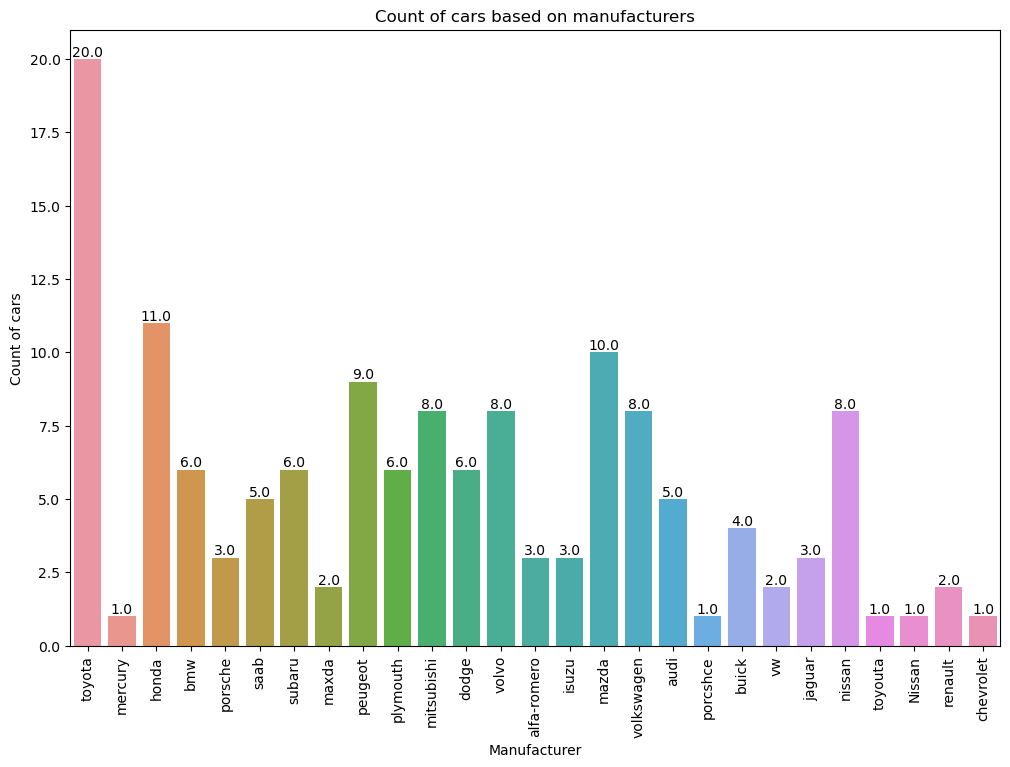

In [16]:
#Data Visualization
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [17]:
print(X_train.shape)
print(y_train.shape)

(143, 25)
(143,)


In [18]:
X_train = X_train.values.reshape(-1, 1)  # Reshape if necessary
y_train = y_train.values.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)


(3575, 1)
(143, 1)


In [46]:
x = my_data.drop(['price', 'CarName', 'fueltype', 'aspiration',	'doornumber', 'carbody',	'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1)
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_name_encoded
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,2
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,3
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,4
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,139
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,138
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,140
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,142


In [48]:
y = my_data['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [55]:
# Importing train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
# Importing Linear Regression library
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred = model.predict(x_train)
y_pred

array([14637.40794659, 17845.55904203,  5309.58741214,  6491.11554337,
       10444.30776124,  6761.66452   ,  8413.41511058, 18365.80104011,
       15786.27053131,  6219.25207643, 20388.10034006,  7100.66631218,
        7812.21929554,  5448.21709799, 16831.54159563, 12889.29122737,
        9531.55907609, 27240.69394991,  5208.54927878,  9261.47012189,
       21567.93533808,  7529.86284971, 19347.35265803, 11806.16488931,
        7457.75130938, 17890.300787  ,  7968.8989646 , 20227.30376786,
       10544.02409987,  5305.66623931, 17210.02820001,  9170.22628852,
        6308.49194273, 18126.44245202, 11059.47664547, 10953.21339915,
       14928.90124232,  6938.51206677,  7930.68058845,  7223.16366991,
       17126.36449729, 17274.88490159, 18894.24297165, 18384.89257439,
        7084.41598546, 11341.9486529 ,  6495.29477919, 27093.37300052,
       10154.37144374,  8567.22824677,  9125.01959736, 18382.44568754,
       10349.97138395,  7078.42483637, 14537.18630103,  9273.1649524 ,
      

In [62]:
from sklearn import metrics

error_square = metrics.r2_score(y_train, y_pred)
print("Error square: ", error_square)

Error square:  0.8698492394877892


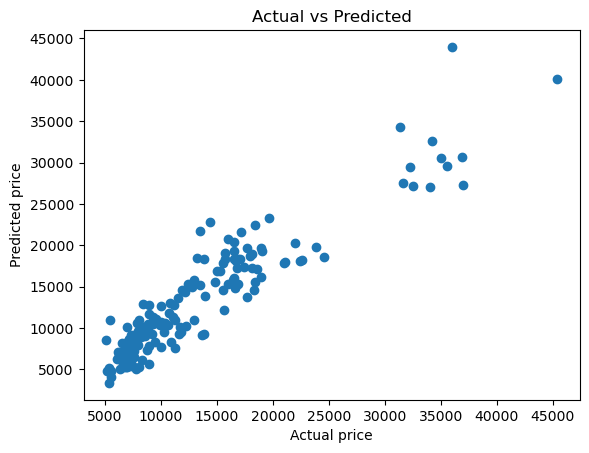

In [63]:
plt.scatter(y_train,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
#In this task, I took Car Price dataset and performed Linear Regression  Algorithm to make model.
#Many analyses of the dataset were performed.
#Finally, I plotted a graph for actual vs. predicted value